# Let's prepare the data!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

# Proyecto 1: Salarios de España
### 1. Explicar la diferencia de salario general del pais entre géneros 

### 2. Explicar la diferencia de los salarios más altos entre géneros por comunidad autónoma. Hacer gráficos

### 3. Explicar la diferencia de salarios más altos por comunidad autónoma (upper_quantile y 90 ). Hacer gráficos

### 4. Explicar la diferencia de salarios más bajos por comunidad autónoma (lower_quantile y 10). Hacer gráficos

### 5. Analizar temporalmente los salarios generales y compararlos con la media de EU



In [2]:
pd.set_option('display.max_rows', 500)
data = pd.read_csv('spain_salary_distribution.csv')
data.head(200)


,year,state,gender,statistic,gross_income_euros
0,2017,nationwide,both,mean,23646.50
1,2016,nationwide,both,mean,23156.34
2,2015,nationwide,both,mean,23106.30
3,2014,nationwide,both,mean,22858.17
4,2013,nationwide,both,mean,22697.86
5,2012,nationwide,both,mean,22726.44
6,2011,nationwide,both,mean,22899.35
7,2010,nationwide,both,mean,22790.20
8,2009,nationwide,both,mean,22511.47
9,2008,nationwide,both,mean,21883.42


In [3]:
#Let's explore the nationwide
data.describe(include='all')

,year,state,gender,statistic,gross_income_euros
count,3240.000000,3240,3240,3240,3240.000000
unique,NaN,18,3,6,NaN
top,NaN,País Vasco,both,90th_percentile,NaN
freq,NaN,180,1080,540,NaN
mean,2012.500000,NaN,NaN,NaN,21357.354593
std,2.872725,NaN,NaN,NaN,10194.037847
min,2008.000000,NaN,NaN,NaN,4217.830000
25%,2010.000000,NaN,NaN,NaN,13331.812500
50%,2012.500000,NaN,NaN,NaN,19809.425000
75%,2015.000000,NaN,NaN,NaN,27086.982500


In [4]:
print(data['state'].unique())
print(data['gender'].unique())
print(data['statistic'].unique())

['nationwide' 'Andalucía' 'Aragón' 'Asturias, Principado de'
 'Balears, Illes' 'Canarias' 'Cantabria' 'Castilla y León'
 'Castilla - La Mancha' 'Cataluña' 'Comunitat Valenciana' 'Extremadura'
 'Galicia' 'Madrid, Comunidad de' 'Murcia, Región de'
 'Navarra, Comunidad Foral de' 'País Vasco' 'Rioja, La']
['both' 'female' 'male']
['mean' '10th_percentile' 'lower_quartile' 'median' 'upper_quartile'
 '90th_percentile']


In [5]:
nationwide=data['state']=='nationwide'
data_nationwide=data[nationwide]
data_nationwide.head(15)

,year,state,gender,statistic,gross_income_euros
0,2017,nationwide,both,mean,23646.50
1,2016,nationwide,both,mean,23156.34
2,2015,nationwide,both,mean,23106.30
3,2014,nationwide,both,mean,22858.17
4,2013,nationwide,both,mean,22697.86
5,2012,nationwide,both,mean,22726.44
6,2011,nationwide,both,mean,22899.35
7,2010,nationwide,both,mean,22790.20
8,2009,nationwide,both,mean,22511.47
9,2008,nationwide,both,mean,21883.42


In [6]:
data_nationwide_mean=data_nationwide[data_nationwide['statistic']=='mean']
# plt.scatter(data_nationwide['year'][0:9],data_nationwide[data_nationwide['statistic']=='mean'])
data_nationwide_mean.drop(columns=['state','statistic'])

,year,gender,gross_income_euros
0,2017,both,23646.50
1,2016,both,23156.34
2,2015,both,23106.30
3,2014,both,22858.17
4,2013,both,22697.86
5,2012,both,22726.44
6,2011,both,22899.35
7,2010,both,22790.20
8,2009,both,22511.47
9,2008,both,21883.42


In [7]:
data_nationwide_mean.loc[data_nationwide_mean['gender'] == 'male'].gross_income_euros

120    26391.84
121    25924.43
122    25992.76
123    25727.24
124    25675.17
125    25682.05
126    25667.89
127    25479.74
128    25001.05
129    24203.33
Name: gross_income_euros, dtype: float64

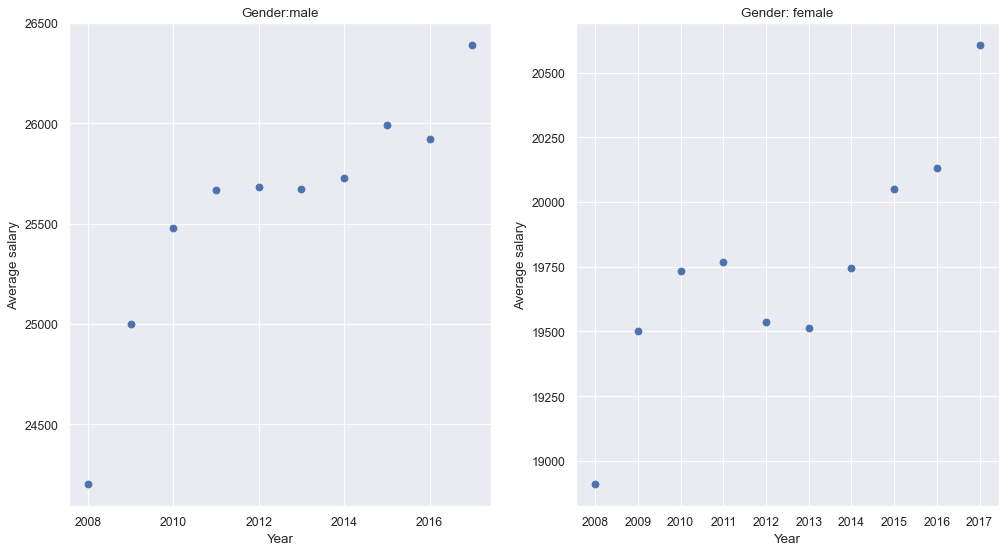

In [8]:
#adjusting the figure characteristics
fig = plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(data_nationwide_mean.loc[data_nationwide_mean['gender'] == 'male'].year,data_nationwide_mean.loc[data_nationwide_mean['gender'] == 'male'].gross_income_euros)
ax2.scatter(data_nationwide_mean.loc[data_nationwide_mean['gender'] == 'female'].year,data_nationwide_mean.loc[data_nationwide_mean['gender'] == 'female'].gross_income_euros)

ax1.set_title('Gender:male')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average salary')
plt.xticks(list((data_nationwide_mean.loc[data_nationwide_mean['gender'] == 'male'].year)))

ax2.set_title('Gender: female')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average salary')
plt.xticks(list((data_nationwide_mean.loc[data_nationwide_mean['gender'] == 'male'].year)))

plt.show()

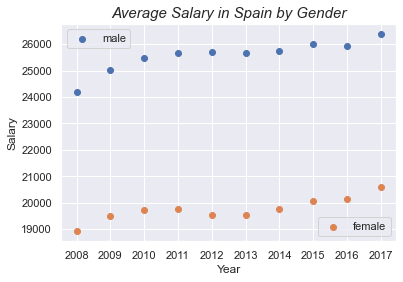

In [9]:
a=plt.scatter(data_nationwide_mean.loc[data_nationwide_mean['gender'] == 'male'].year,
            data_nationwide_mean.loc[data_nationwide_mean['gender'] == 'male'].gross_income_euros,label='male')
b=plt.scatter(data_nationwide_mean.loc[data_nationwide_mean['gender'] == 'female'].year,
            data_nationwide_mean.loc[data_nationwide_mean['gender'] == 'female'].gross_income_euros, label='female')
plt.xticks(list((data_nationwide_mean.loc[data_nationwide_mean['gender'] == 'male'].year)))
plt.xlabel('Year')
plt.ylabel('Salary')
plt.title('Average Salary in Spain by Gender', fontstyle='oblique', fontsize=15)
plt.legend()

first_legend = plt.legend(handles=[a], loc='upper left')

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

# Create another legend for the second line.
plt.legend(handles=[b], loc='lower right')

plt.show()

#### 1.1. Explicar la diferencia de los salarios más altos entre géneros por comunidad autónoma

In [10]:
data

,year,state,gender,statistic,gross_income_euros
0,2017,nationwide,both,mean,23646.50
1,2016,nationwide,both,mean,23156.34
2,2015,nationwide,both,mean,23106.30
3,2014,nationwide,both,mean,22858.17
4,2013,nationwide,both,mean,22697.86
...,...,...,...,...,...
3235,2012,"Rioja, La",male,90th_percentile,39861.33
3236,2011,"Rioja, La",male,90th_percentile,38106.71
3237,2010,"Rioja, La",male,90th_percentile,39760.46
3238,2009,"Rioja, La",male,90th_percentile,37994.40


In [11]:
print(data['state'].unique())
print(data['gender'].unique())
print(data['statistic'].unique())

['nationwide' 'Andalucía' 'Aragón' 'Asturias, Principado de'
 'Balears, Illes' 'Canarias' 'Cantabria' 'Castilla y León'
 'Castilla - La Mancha' 'Cataluña' 'Comunitat Valenciana' 'Extremadura'
 'Galicia' 'Madrid, Comunidad de' 'Murcia, Región de'
 'Navarra, Comunidad Foral de' 'País Vasco' 'Rioja, La']
['both' 'female' 'male']
['mean' '10th_percentile' 'lower_quartile' 'median' 'upper_quartile'
 '90th_percentile']


In [12]:
data_notNationwide=data[data['state'] != 'nationwide']

In [13]:
data_notNationwide_upper_and_90= data_notNationwide[data['statistic'].isin(['90th_percentile','upper_quartile']) ]

<ipython-input-13-9c63eab11db3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_notNationwide_upper_and_90= data_notNationwide[data['statistic'].isin(['90th_percentile','upper_quartile']) ]


In [14]:
data_notNationwide_upper_and_90.head(50)

,year,state,gender,statistic,gross_income_euros
220,2017,Andalucía,both,upper_quartile,26668.08
221,2016,Andalucía,both,upper_quartile,26862.33
222,2015,Andalucía,both,upper_quartile,27048.58
223,2014,Andalucía,both,upper_quartile,26129.25
224,2013,Andalucía,both,upper_quartile,26357.12
225,2012,Andalucía,both,upper_quartile,25948.92
226,2011,Andalucía,both,upper_quartile,26681.90
227,2010,Andalucía,both,upper_quartile,25569.75
228,2009,Andalucía,both,upper_quartile,26036.43
229,2008,Andalucía,both,upper_quartile,24537.31


#### Sueldos más altos por comnidad autónoma

In [15]:
# ordenar por columnas https://stackoverflow.com/questions/41119623/pandas-pivot-table-sort-values-by-columns

table_high_salaries= pd.pivot_table(data_notNationwide_upper_and_90,index=["state","gender"],values=["gross_income_euros"],
               columns=["statistic"])

table_high_salaries.reindex(table_high_salaries['gross_income_euros'].sort_values(by=['upper_quartile','90th_percentile'], ascending=False).index)


gross_income_euros               
statistic                             90th_percentile upper_quartile
state                       gender                                  
País Vasco                  male            48483.189      37960.321
Madrid, Comunidad de        male            53871.063      37002.919
País Vasco                  both            45105.292      35148.425
Navarra, Comunidad Foral de male            44113.252      34372.901
Cataluña                    male            47454.017      34299.662
Madrid, Comunidad de        both            48756.868      33229.004
Asturias, Principado de     male            43158.630      32224.994
Navarra, Comunidad Foral de both            40633.828      31062.306
País Vasco                  female          40789.133      30657.562
Cataluña                    both            42636.877      30625.605
Aragón                      male            42067.894      30532.388
Cantabria                   male            40793.900      29345.673
Madrid, Comunidad de        female          42985.752      29236.712
Andalucía                   male            41397.521      28757.463
Castilla y León             male            40226.554      28535.380
Asturias, Principado de     both            39945.174      28382.540
Comunitat Valenciana        male            40825.586      28292.678
Rioja, La                   male            39824.718      27974.141
Murcia, Región de           male            40577.808      27906.069
Aragón                      both            38394.806      27649.979
Balears, Illes              male            39130.060      26915.879
Galicia                     male            38727.200      26532.150
Cataluña                    female          37031.184      26404.324
Cantabria                   both            37594.533      26296.120
Castilla - La Mancha        male            38524.840      26269.410
Andalucía                   both            37927.117      26183.967
Castilla y León             both            37020.461      26045.828
Rioja, La                   both            36865.304      25753.430
Comunitat Valenciana        both            37105.921      25535.145
Navarra, Comunidad Foral de female          34924.643      25498.856
Murcia, Región de           both            37196.687      25272.922
Balears, Illes              both            36158.802      24867.194
Castilla - La Mancha        both            36110.896      24642.922
Canarias                    male            36514.732      24585.465
Extremadura                 male            35563.820      24531.605
Galicia                     both            35478.865      24208.356
Extremadura                 both            33792.165      23550.006
Asturias, Principado de     female          34424.789      23446.330
Canarias                    both            34754.800      23377.271
Aragón                      female          33501.479      23369.033
Andalucía                   female          33343.164      23314.399
Balears, Illes              female          32957.927      23087.639
Rioja, La                   female          33244.272      22941.467
Castilla y León             female          32834.641      22909.649
Castilla - La Mancha        female          32512.403      22692.970
Extremadura                 female          31880.439      22516.285
Comunitat Valenciana        female          32364.594      22414.873
Murcia, Región de           female          32747.281      22338.064
Cantabria                   female          33225.284      22325.639
Canarias                    female          32933.228      22063.839
Galicia                     female          31648.750      21609.821

#### Sueldos más altos en cada comunidad por género

In [16]:
table_high_salaries_2= pd.pivot_table(data_notNationwide_upper_and_90,index=["state","gender"],values=["gross_income_euros"],
               columns=["statistic"])
#you must order by value. That's the reason you must put table_high_salaries_2['state']. pivot table make the mean of all the
#years
table_high_salaries_2.reindex(table_high_salaries_2['gross_income_euros'].sort_values(by=['gender','upper_quartile'], ascending=False).index)

gross_income_euros               
statistic                             90th_percentile upper_quartile
state                       gender                                  
País Vasco                  male            48483.189      37960.321
Madrid, Comunidad de        male            53871.063      37002.919
Navarra, Comunidad Foral de male            44113.252      34372.901
Cataluña                    male            47454.017      34299.662
Asturias, Principado de     male            43158.630      32224.994
Aragón                      male            42067.894      30532.388
Cantabria                   male            40793.900      29345.673
Andalucía                   male            41397.521      28757.463
Castilla y León             male            40226.554      28535.380
Comunitat Valenciana        male            40825.586      28292.678
Rioja, La                   male            39824.718      27974.141
Murcia, Región de           male            40577.808      27906.069
Balears, Illes              male            39130.060      26915.879
Galicia                     male            38727.200      26532.150
Castilla - La Mancha        male            38524.840      26269.410
Canarias                    male            36514.732      24585.465
Extremadura                 male            35563.820      24531.605
País Vasco                  female          40789.133      30657.562
Madrid, Comunidad de        female          42985.752      29236.712
Cataluña                    female          37031.184      26404.324
Navarra, Comunidad Foral de female          34924.643      25498.856
Asturias, Principado de     female          34424.789      23446.330
Aragón                      female          33501.479      23369.033
Andalucía                   female          33343.164      23314.399
Balears, Illes              female          32957.927      23087.639
Rioja, La                   female          33244.272      22941.467
Castilla y León             female          32834.641      22909.649
Castilla - La Mancha        female          32512.403      22692.970
Extremadura                 female          31880.439      22516.285
Comunitat Valenciana        female          32364.594      22414.873
Murcia, Región de           female          32747.281      22338.064
Cantabria                   female          33225.284      22325.639
Canarias                    female          32933.228      22063.839
Galicia                     female          31648.750      21609.821
País Vasco                  both            45105.292      35148.425
Madrid, Comunidad de        both            48756.868      33229.004
Navarra, Comunidad Foral de both            40633.828      31062.306
Cataluña                    both            42636.877      30625.605
Asturias, Principado de     both            39945.174      28382.540
Aragón                      both            38394.806      27649.979
Cantabria                   both            37594.533      26296.120
Andalucía                   both            37927.117      26183.967
Castilla y León             both            37020.461      26045.828
Rioja, La                   both            36865.304      25753.430
Comunitat Valenciana        both            37105.921      25535.145
Murcia, Región de           both            37196.687      25272.922
Balears, Illes              both            36158.802      24867.194
Castilla - La Mancha        both            36110.896      24642.922
Galicia                     both            35478.865      24208.356
Extremadura                 both            33792.165      23550.006
Canarias                    both            34754.800      23377.271

In [17]:
table_high_salaries_3= pd.pivot_table(data_notNationwide_upper_and_90,index=["state","statistic"],values=["gross_income_euros"],
               columns=["gender"])
table_high_salaries_3
# table_high_salaries_3.reindex(table_high_salaries_3['gross_income_euros'].sort_values(by='upper_quartile', ascending=False).index)

gross_income_euros             \
gender                                                    both     female   
state                       statistic                                       
Andalucía                   90th_percentile          37927.117  33343.164   
                            upper_quartile           26183.967  23314.399   
Aragón                      90th_percentile          38394.806  33501.479   
                            upper_quartile           27649.979  23369.033   
Asturias, Principado de     90th_percentile          39945.174  34424.789   
                            upper_quartile           28382.540  23446.330   
Balears, Illes              90th_percentile          36158.802  32957.927   
                            upper_quartile           24867.194  23087.639   
Canarias                    90th_percentile          34754.800  32933.228   
                            upper_quartile           23377.271  22063.839   
Cantabria                   90th_percentile          37594.533  33225.284   
                            upper_quartile           26296.120  22325.639   
Castilla - La Mancha        90th_percentile          36110.896  32512.403   
                            upper_quartile           24642.922  22692.970   
Castilla y León             90th_percentile          37020.461  32834.641   
                            upper_quartile           26045.828  22909.649   
Cataluña                    90th_percentile          42636.877  37031.184   
                            upper_quartile           30625.605  26404.324   
Comunitat Valenciana        90th_percentile          37105.921  32364.594   
                            upper_quartile           25535.145  22414.873   
Extremadura                 90th_percentile          33792.165  31880.439   
                            upper_quartile           23550.006  22516.285   
Galicia                     90th_percentile          35478.865  31648.750   
                            upper_quartile           24208.356  21609.821   
Madrid, Comunidad de        90th_percentile          48756.868  42985.752   
                            upper_quartile           33229.004  29236.712   
Murcia, Región de           90th_percentile          37196.687  32747.281   
                            upper_quartile           25272.922  22338.064   
Navarra, Comunidad Foral de 90th_percentile          40633.828  34924.643   
                            upper_quartile           31062.306  25498.856   
País Vasco                  90th_percentile          45105.292  40789.133   
                            upper_quartile           35148.425  30657.562   
Rioja, La                   90th_percentile          36865.304  33244.272   
                            upper_quartile           25753.430  22941.467   

                                                        
gender                                            male  
state                       statistic                   
Andalucía                   90th_percentile  41397.521  
                            upper_quartile   28757.463  
Aragón                      90th_percentile  42067.894  
                            upper_quartile   30532.388  
Asturias, Principado de     90th_percentile  43158.630  
                            upper_quartile   32224.994  
Balears, Illes              90th_percentile  39130.060  
                            upper_quartile   26915.879  
Canarias                    90th_percentile  36514.732  
                            upper_quartile   24585.465  
Cantabria                   90th_percentile  40793.900  
                            upper_quartile   29345.673  
Castilla - La Mancha        90th_percentile  38524.840  
                            upper_quartile   26269.410  
Castilla y León             90th_percentile  40226.554  
                            upper_quartile   28535.380  
Cataluña                    90th_percentile  47454.017  
                            upper_quartile   34299.662

In [18]:
table_high_salaries_3['gross_income_euros']['male'][0]
table_high_salaries_3['diff']=table_high_salaries_3['gross_income_euros']['male']-table_high_salaries_3['gross_income_euros']['female']

#### Desigualdad por género masculino y femenino por comunidades en sueldos altos y super altos

In [19]:


table_high_salaries_3=table_high_salaries_3.reindex(table_high_salaries_3.sort_values(by=['statistic','diff'],ascending=False).index)

table_high_salaries_3

gross_income_euros             \
gender                                                    both     female   
state                       statistic                                       
Navarra, Comunidad Foral de upper_quartile           31062.306  25498.856   
Asturias, Principado de     upper_quartile           28382.540  23446.330   
Cataluña                    upper_quartile           30625.605  26404.324   
Madrid, Comunidad de        upper_quartile           33229.004  29236.712   
País Vasco                  upper_quartile           35148.425  30657.562   
Aragón                      upper_quartile           27649.979  23369.033   
Cantabria                   upper_quartile           26296.120  22325.639   
Comunitat Valenciana        upper_quartile           25535.145  22414.873   
Castilla y León             upper_quartile           26045.828  22909.649   
Murcia, Región de           upper_quartile           25272.922  22338.064   
Andalucía                   upper_quartile           26183.967  23314.399   
Rioja, La                   upper_quartile           25753.430  22941.467   
Galicia                     upper_quartile           24208.356  21609.821   
Balears, Illes              upper_quartile           24867.194  23087.639   
Castilla - La Mancha        upper_quartile           24642.922  22692.970   
Canarias                    upper_quartile           23377.271  22063.839   
Extremadura                 upper_quartile           23550.006  22516.285   
Madrid, Comunidad de        90th_percentile          48756.868  42985.752   
Cataluña                    90th_percentile          42636.877  37031.184   
Navarra, Comunidad Foral de 90th_percentile          40633.828  34924.643   
Asturias, Principado de     90th_percentile          39945.174  34424.789   
Aragón                      90th_percentile          38394.806  33501.479   
Comunitat Valenciana        90th_percentile          37105.921  32364.594   
Andalucía                   90th_percentile          37927.117  33343.164   
Murcia, Región de           90th_percentile          37196.687  32747.281   
País Vasco                  90th_percentile          45105.292  40789.133   
Cantabria                   90th_percentile          37594.533  33225.284   
Castilla y León             90th_percentile          37020.461  32834.641   
Galicia                     90th_percentile          35478.865  31648.750   
Rioja, La                   90th_percentile          36865.304  33244.272   
Balears, Illes              90th_percentile          36158.802  32957.927   
Castilla - La Mancha        90th_percentile          36110.896  32512.403   
Extremadura                 90th_percentile          33792.165  31880.439   
Canarias                    90th_percentile          34754.800  32933.228   

                                                             diff  
gender                                            male             
state                       statistic                              
Navarra, Comunidad Foral de upper_quartile   34372.901   8874.045  
Asturias, Principado de     upper_quartile   32224.994   8778.664  
Cataluña                    upper_quartile   34299.662   7895.338  
Madrid, Comunidad de        upper_quartile   37002.919   7766.207  
País Vasco                  upper_quartile   37960.321   7302.759  
Aragón                      upper_quartile   30532.388   7163.355  
Cantabria                   upper_quartile   29345.673   7020.034  
Comunitat Valenciana        upper_quartile   28292.678   5877.805  
Castilla y León             upper_quartile   28535.380   5625.731  
Murcia, Región de           upper_quartile   27906.069   5568.005  
Andalucía                   upper_quartile   28757.463   5443.064  
Rioja, La                   upper_quartile   27974.141   5032.674  
Galicia                     upper_quartile   26532.150   4922.329  
Balears, Illes              upper_quartile   26915.879   3828.240  
Castilla - La Mancha        upper_quar

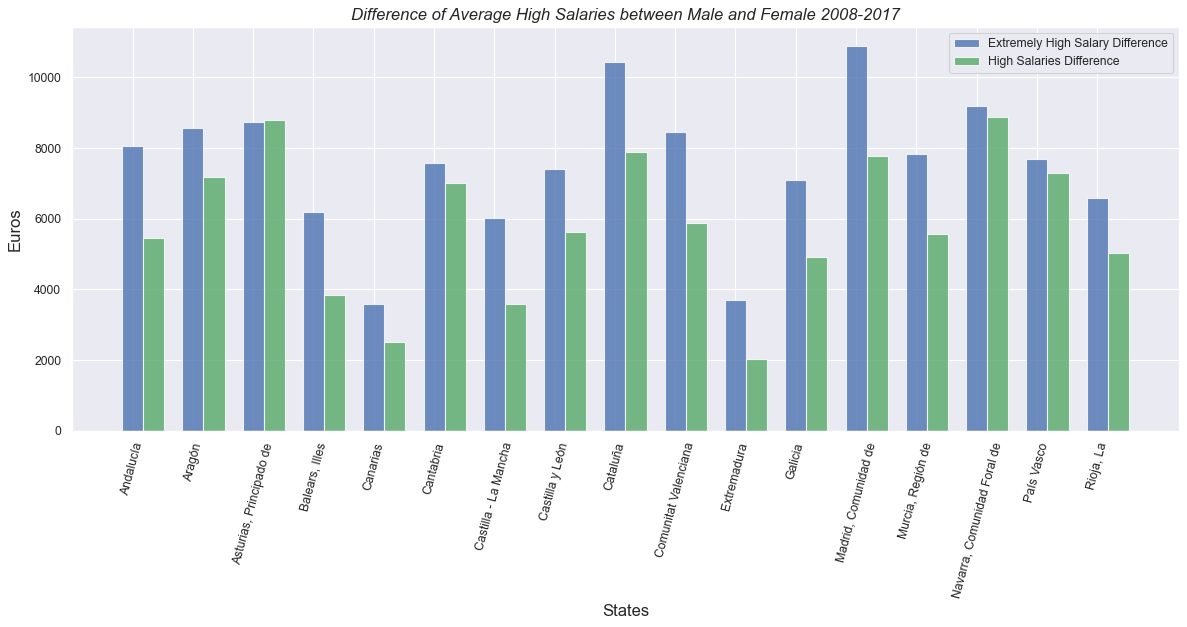

In [43]:
# g=pd.DataFrame(data = table_high_salaries_3['diff'])
# #para deshacer los indices del pivot_table
# g=g.reset_index()
# diff_90th_percentile=g[g['statistic']=='90th_percentile']
# diff_90th_percentile
# diff_upper_quartile=g[g['statistic']=='upper_quartile']#.sort_values(by='diff',ascending=False)
# diff_upper_quartile




# n_groups_ = len(g['state'].unique())

# plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')

# index_=np.arange(n_groups_)
# bar_width = 0.35
# opacity = 0.8

# rects1 = plt.bar(index_, diff_90th_percentile['diff'], bar_width,
# alpha=opacity,
# color='b',
# label='Extremely Upper Salary Difference')
# #se indica el index+bar_width para separar las columnas y que no se superpongan una a la otra
# rects2 = plt.bar(index + bar_width, diff_upper_quartile['diff'], bar_width,
# alpha=opacity,
# color='g',
# label='High Salaries Difference')

# plt.xlabel('States', fontsize=15)
# plt.ylabel('Euros', fontsize=15)


# plt.title('Difference of Average High Salaries between Male and Female 2008-2017', fontstyle='oblique', fontsize=15)
# plt.xticks(index_,diff_upper_quartile['state'].unique(),rotation=75)
# plt.legend()

# plt.tight_layout()
# plt.show()



g=pd.DataFrame(data = table_high_salaries_3['diff'])
#para deshacer los indices del pivot_table
g=g.sort_values(by='state', ascending=True).reset_index()
diff_90th_percentile=g[g['statistic']=='90th_percentile']
diff_90th_percentile
diff_upper_quartile=g[g['statistic']=='upper_quartile']#.sort_values(by='diff',ascending=False)
diff_upper_quartile




n_groups_ = len(g['state'].unique())

plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
# index = f['state'].unique()
index_=np.arange(n_groups_)
bar_width = 0.35
opacity = 0.8

rects1_ = plt.bar(index_, diff_90th_percentile['diff'], bar_width,
alpha=opacity,
color='b',
label='Extremely High Salary Difference')
#se indica el index+bar_width para separar las columnas y que no se superpongan una a la otra
rects2_ = plt.bar(index_ + bar_width, diff_upper_quartile['diff'], bar_width,
alpha=opacity,
color='g',
label='High Salaries Difference')

plt.xlabel('States', fontsize=15)
plt.ylabel('Euros', fontsize=15)


plt.title('Difference of Average High Salaries between Male and Female 2008-2017', fontstyle='oblique', fontsize=15)
plt.xticks(index_,diff_upper_quartile['state'].unique(),rotation=75)
plt.legend()

plt.tight_layout()
plt.show()

### 4. Explicar la diferencia de salarios más bajos por comunidad autónoma (lower_quantile y 10)

In [22]:
data

,year,state,gender,statistic,gross_income_euros
0,2017,nationwide,both,mean,23646.50
1,2016,nationwide,both,mean,23156.34
2,2015,nationwide,both,mean,23106.30
3,2014,nationwide,both,mean,22858.17
4,2013,nationwide,both,mean,22697.86
...,...,...,...,...,...
3235,2012,"Rioja, La",male,90th_percentile,39861.33
3236,2011,"Rioja, La",male,90th_percentile,38106.71
3237,2010,"Rioja, La",male,90th_percentile,39760.46
3238,2009,"Rioja, La",male,90th_percentile,37994.40


In [23]:
print(data['state'].unique())
print(data['gender'].unique())
print(data['statistic'].unique())

['nationwide' 'Andalucía' 'Aragón' 'Asturias, Principado de'
 'Balears, Illes' 'Canarias' 'Cantabria' 'Castilla y León'
 'Castilla - La Mancha' 'Cataluña' 'Comunitat Valenciana' 'Extremadura'
 'Galicia' 'Madrid, Comunidad de' 'Murcia, Región de'
 'Navarra, Comunidad Foral de' 'País Vasco' 'Rioja, La']
['both' 'female' 'male']
['mean' '10th_percentile' 'lower_quartile' 'median' 'upper_quartile'
 '90th_percentile']


In [24]:
data_notNationwide_lower_and_10 = data_notNationwide[data['statistic'].isin(['10th_percentile','lower_quartile'])]

<ipython-input-24-42d4a5ac969e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_notNationwide_lower_and_10 = data_notNationwide[data['statistic'].isin(['10th_percentile','lower_quartile'])]


In [25]:
data_notNationwide_lower_and_10.reset_index(drop=True)

,year,state,gender,statistic,gross_income_euros
0,2017,Andalucía,both,10th_percentile,7836.76
1,2016,Andalucía,both,10th_percentile,7427.89
2,2015,Andalucía,both,10th_percentile,7438.69
3,2014,Andalucía,both,10th_percentile,6741.52
4,2013,Andalucía,both,10th_percentile,7066.88
...,...,...,...,...,...
1015,2012,"Rioja, La",male,lower_quartile,15387.11
1016,2011,"Rioja, La",male,lower_quartile,16217.00
1017,2010,"Rioja, La",male,lower_quartile,16206.31
1018,2009,"Rioja, La",male,lower_quartile,16108.09


In [26]:
table_low_salaries= pd.pivot_table(data_notNationwide_lower_and_10,index=["state","gender"],values=["gross_income_euros"],
               columns=["statistic"])

table_low_salaries.reindex(table_low_salaries['gross_income_euros'].sort_values(by=['lower_quartile','10th_percentile'], ascending=False).index)


gross_income_euros               
statistic                             10th_percentile lower_quartile
state                       gender                                  
País Vasco                  male            13307.552      19835.070
Navarra, Comunidad Foral de male            12761.613      19281.748
Cataluña                    male            11291.470      17129.294
Aragón                      male            11858.800      16667.246
Asturias, Principado de     male            10856.501      16602.844
País Vasco                  both             9666.175      16443.978
Madrid, Comunidad de        male            11241.281      16213.238
Rioja, La                   male            11792.106      16197.388
Cantabria                   male            11319.461      15814.213
Navarra, Comunidad Foral de both             8952.201      15536.211
Balears, Illes              male            10862.016      15393.468
Castilla y León             male            11167.587      15383.222
Galicia                     male            11649.780      15283.755
Comunitat Valenciana        male            10431.183      15249.529
Castilla - La Mancha        male            11239.251      15173.223
Andalucía                   male            10067.993      14992.422
Murcia, Región de           male            10915.343      14970.375
Cataluña                    both             8706.523      14358.091
Madrid, Comunidad de        both             9450.376      14295.574
Balears, Illes              both             9106.176      14068.010
Extremadura                 male            10248.034      14011.052
Aragón                      both             8384.570      13863.324
Rioja, La                   both             8041.046      13560.019
Canarias                    male             9245.216      13265.637
Asturias, Principado de     both             8007.442      13191.390
Castilla - La Mancha        both             7878.584      13091.107
Cantabria                   both             8093.644      12993.295
Castilla y León             both             7849.124      12977.017
País Vasco                  female           7851.109      12908.372
Galicia                     both             8235.211      12908.267
Comunitat Valenciana        both             7400.866      12718.469
Balears, Illes              female           8214.727      12633.659
Madrid, Comunidad de        female           8046.744      12610.597
Andalucía                   both             7467.498      12446.232
Murcia, Región de           both             7388.529      12412.067
Extremadura                 both             6942.470      12157.755
Cataluña                    female           7314.641      12069.700
Navarra, Comunidad Foral de female           7157.554      12052.602
Canarias                    both             7662.813      11720.259
Aragón                      female           6822.030      11032.647
Rioja, La                   female           6652.133      10992.641
Asturias, Principado de     female           6762.465      10980.538
Galicia                     female           6471.650      10706.173
Cantabria                   female           6600.516      10444.690
Castilla y León             female           6398.599      10387.694
Canarias                    female           6524.103      10362.889
Comunitat Valenciana        female           6050.497      10145.172
Castilla - La Mancha        female           6282.723      10089.039
Andalucía                   female           6100.869       9739.452
Murcia, Región de           female           5896.218       9677.078
Extremadura                 female           5351.959       9335.652

#### Sueldos más bajos en cada comunidad por género

In [27]:
table_low_salaries_2= pd.pivot_table(data_notNationwide_lower_and_10,index=["state","gender"],values=["gross_income_euros"],
               columns=["statistic"])
#you must order by value. That's the reason you must put table_high_salaries_2['state']. pivot table make the mean of all the
#years
table_low_salaries_2.reindex(table_low_salaries_2['gross_income_euros'].sort_values(by=['gender','lower_quartile'], ascending=False).index)

gross_income_euros               
statistic                             10th_percentile lower_quartile
state                       gender                                  
País Vasco                  male            13307.552      19835.070
Navarra, Comunidad Foral de male            12761.613      19281.748
Cataluña                    male            11291.470      17129.294
Aragón                      male            11858.800      16667.246
Asturias, Principado de     male            10856.501      16602.844
Madrid, Comunidad de        male            11241.281      16213.238
Rioja, La                   male            11792.106      16197.388
Cantabria                   male            11319.461      15814.213
Balears, Illes              male            10862.016      15393.468
Castilla y León             male            11167.587      15383.222
Galicia                     male            11649.780      15283.755
Comunitat Valenciana        male            10431.183      15249.529
Castilla - La Mancha        male            11239.251      15173.223
Andalucía                   male            10067.993      14992.422
Murcia, Región de           male            10915.343      14970.375
Extremadura                 male            10248.034      14011.052
Canarias                    male             9245.216      13265.637
País Vasco                  female           7851.109      12908.372
Balears, Illes              female           8214.727      12633.659
Madrid, Comunidad de        female           8046.744      12610.597
Cataluña                    female           7314.641      12069.700
Navarra, Comunidad Foral de female           7157.554      12052.602
Aragón                      female           6822.030      11032.647
Rioja, La                   female           6652.133      10992.641
Asturias, Principado de     female           6762.465      10980.538
Galicia                     female           6471.650      10706.173
Cantabria                   female           6600.516      10444.690
Castilla y León             female           6398.599      10387.694
Canarias                    female           6524.103      10362.889
Comunitat Valenciana        female           6050.497      10145.172
Castilla - La Mancha        female           6282.723      10089.039
Andalucía                   female           6100.869       9739.452
Murcia, Región de           female           5896.218       9677.078
Extremadura                 female           5351.959       9335.652
País Vasco                  both             9666.175      16443.978
Navarra, Comunidad Foral de both             8952.201      15536.211
Cataluña                    both             8706.523      14358.091
Madrid, Comunidad de        both             9450.376      14295.574
Balears, Illes              both             9106.176      14068.010
Aragón                      both             8384.570      13863.324
Rioja, La                   both             8041.046      13560.019
Asturias, Principado de     both             8007.442      13191.390
Castilla - La Mancha        both             7878.584      13091.107
Cantabria                   both             8093.644      12993.295
Castilla y León             both             7849.124      12977.017
Galicia                     both             8235.211      12908.267
Comunitat Valenciana        both             7400.866      12718.469
Andalucía                   both             7467.498      12446.232
Murcia, Región de           both             7388.529      12412.067
Extremadura                 both             6942.470      12157.755
Canarias                    both             7662.813      11720.259

#### Desigualdad por género masculino y femenino por comunidades en sueldos bajos y super bajos

In [28]:
table_low_salaries_3= pd.pivot_table(data_notNationwide_lower_and_10,index=["state","statistic"],values=["gross_income_euros"],
               columns=["gender"])

table_low_salaries_3['gross_income_euros']['male'][0]
table_low_salaries_3['diff']=table_low_salaries_3['gross_income_euros']['male']-table_low_salaries_3['gross_income_euros']['female']

table_low_salaries_3.reindex(table_low_salaries_3.sort_values(by=['statistic','diff'],ascending=False).index)

gross_income_euros             \
gender                                                    both     female   
state                       statistic                                       
Navarra, Comunidad Foral de lower_quartile           15536.211  12052.602   
País Vasco                  lower_quartile           16443.978  12908.372   
Aragón                      lower_quartile           13863.324  11032.647   
Asturias, Principado de     lower_quartile           13191.390  10980.538   
Cantabria                   lower_quartile           12993.295  10444.690   
Murcia, Región de           lower_quartile           12412.067   9677.078   
Andalucía                   lower_quartile           12446.232   9739.452   
Rioja, La                   lower_quartile           13560.019  10992.641   
Comunitat Valenciana        lower_quartile           12718.469  10145.172   
Castilla - La Mancha        lower_quartile           13091.107  10089.039   
Cataluña                    lower_quartile           14358.091  12069.700   
Castilla y León             lower_quartile           12977.017  10387.694   
Extremadura                 lower_quartile           12157.755   9335.652   
Galicia                     lower_quartile           12908.267  10706.173   
Madrid, Comunidad de        lower_quartile           14295.574  12610.597   
Canarias                    lower_quartile           11720.259  10362.889   
Balears, Illes              lower_quartile           14068.010  12633.659   
Navarra, Comunidad Foral de 10th_percentile           8952.201   7157.554   
País Vasco                  10th_percentile           9666.175   7851.109   
Galicia                     10th_percentile           8235.211   6471.650   
Rioja, La                   10th_percentile           8041.046   6652.133   
Aragón                      10th_percentile           8384.570   6822.030   
Murcia, Región de           10th_percentile           7388.529   5896.218   
Castilla - La Mancha        10th_percentile           7878.584   6282.723   
Extremadura                 10th_percentile           6942.470   5351.959   
Castilla y León             10th_percentile           7849.124   6398.599   
Cantabria                   10th_percentile           8093.644   6600.516   
Comunitat Valenciana        10th_percentile           7400.866   6050.497   
Asturias, Principado de     10th_percentile           8007.442   6762.465   
Cataluña                    10th_percentile           8706.523   7314.641   
Andalucía                   10th_percentile           7467.498   6100.869   
Madrid, Comunidad de        10th_percentile           9450.376   8046.744   
Canarias                    10th_percentile           7662.813   6524.103   
Balears, Illes              10th_percentile           9106.176   8214.727   

                                                            diff  
gender                                            male            
state                       statistic                             
Navarra, Comunidad Foral de lower_quartile   19281.748  7229.146  
País Vasco                  lower_quartile   19835.070  6926.698  
Aragón                      lower_quartile   16667.246  5634.599  
Asturias, Principado de     lower_quartile   16602.844  5622.306  
Cantabria                   lower_quartile   15814.213  5369.523  
Murcia, Región de           lower_quartile   14970.375  5293.297  
Andalucía                   lower_quartile   14992.422  5252.970  
Rioja, La                   lower_quartile   16197.388  5204.747  
Comunitat Valenciana        lower_quartile   15249.529  5104.357  
Castilla - La Mancha        lower_quartile   15173.223  5084.184  
Cataluña                    lower_quartile   17129.294  5059.594  
Castilla y León             lower_quartile   15383.222  4995.528  
Extremadura                 lower_quartile   14011.052  4675.400  
Galicia                     lower_quartile   15283.755  4577.582  
Madrid, Comunidad de        lower_quartile   16213.238 

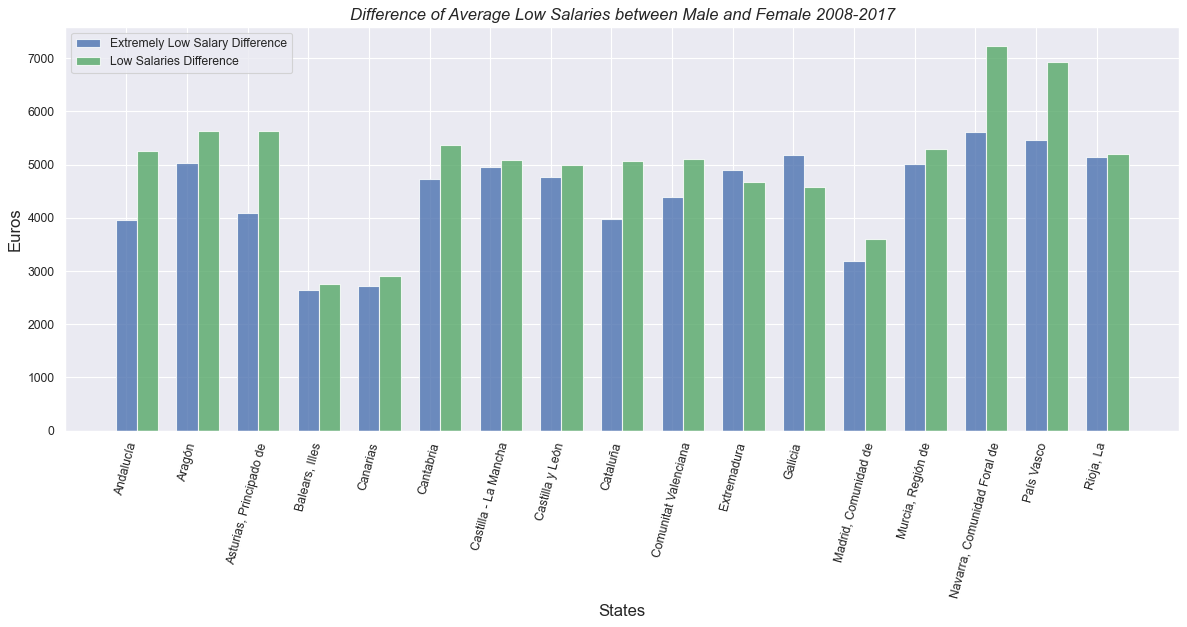

In [29]:
f=pd.DataFrame(data = table_low_salaries_3['diff'])
#para deshacer los indices del pivot_table
f=f.reset_index()
diff_10th_percentile=f[f['statistic']=='10th_percentile']
diff_10th_percentile
diff_lower_quartile=f[f['statistic']=='lower_quartile']#.sort_values(by='diff',ascending=False)
diff_lower_quartile




n_groups = len(f['state'].unique())

plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
# index = f['state'].unique()
index=np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, diff_10th_percentile['diff'], bar_width,
alpha=opacity,
color='b',
label='Extremely Low Salary Difference')
#se indica el index+bar_width para separar las columnas y que no se superpongan una a la otra
rects2 = plt.bar(index + bar_width, diff_lower_quartile['diff'], bar_width,
alpha=opacity,
color='g',
label='Low Salaries Difference')

plt.xlabel('States', fontsize=15)
plt.ylabel('Euros', fontsize=15)


plt.title('Difference of Average Low Salaries between Male and Female 2008-2017', fontstyle='oblique', fontsize=15)
plt.xticks(index,diff_lower_quartile['state'].unique(),rotation=75)
plt.legend()

plt.tight_layout()
plt.show()

### Predicción de salarios 3 próximos años

In [30]:
# # ARIMA example
# from statsmodels.tsa.arima.model import ARIMA
# from random import random
# # contrived dataset
# data_ = [24203.33,
# 25001.05,
# 25479.74,
# 25667.89,
# 25682.05,
# 25675.17,
# 25727.24,
# 25992.76,
# 25924.43, 26391.84]
# # fit model
# model = ARIMA(data_, order=(1, 1, 1))
# model_fit = model.fit()
# # make prediction
# yhat = model_fit.predict(len(data_), len(data_)+5, typ='levels')
# print(yhat)

In [31]:

data_nationwide_mean_male = data_nationwide_mean[data_nationwide_mean['gender'].isin(['male'])].sort_values(by='year',ascending=True).reset_index(drop=True)
data_nationwide_mean_female = data_nationwide_mean[data_nationwide_mean['gender'].isin(['female'])] .sort_values(by='year',ascending=True).reset_index(drop=True)
data_nationwide_mean_both = data_nationwide_mean[data_nationwide_mean['gender'].isin(['both'])] .sort_values(by='year',ascending=True).reset_index(drop=True)

In [32]:
from statsmodels.tsa.arima.model import ARIMA

model_1 = ARIMA(data_nationwide_mean_male.gross_income_euros,order=(1,1,1))
model_1_fit = model_1.fit()
yhat_1 = model_1_fit.predict(len(data_nationwide_mean_male.gross_income_euros), len(data_nationwide_mean_male.gross_income_euros) + 2)

model_2 = ARIMA(data_nationwide_mean_female.gross_income_euros,order=(1,1,1))
model_2_fit = model_2.fit()
yhat_2 = model_2_fit.predict(len(data_nationwide_mean_female.gross_income_euros), len(data_nationwide_mean_female.gross_income_euros) + 2)

model_3 = ARIMA(data_nationwide_mean_both.gross_income_euros,order=(1,1,1))
model_3_fit = model_3.fit()
yhat_3 = model_3_fit.predict(len(data_nationwide_mean_both.gross_income_euros), len(data_nationwide_mean_both.gross_income_euros) + 2)

In [33]:
data_nationwide_mean_male.reset_index(drop=True);
data_nationwide_mean_female.reset_index(drop=True);
data_nationwide_mean_both.reset_index(drop=True);

In [34]:
print(yhat_1,yhat_2,yhat_3)

10    26602.936474
11    26729.306497
12    26804.956187
Name: predicted_mean, dtype: float64 10    20880.066825
11    20991.238634
12    21036.640570
Name: predicted_mean, dtype: float64 10    23901.635733
11    24022.538208
12    24079.830882
Name: predicted_mean, dtype: float64


In [35]:
more_years = pd.Series([2018,2019,2020])
year = data_nationwide_mean_male.year
year=year.append(more_years).reset_index(drop=True)
p=list(yhat_1.round(2))
p.insert(0,26391.84)

p_2=list(yhat_2.round(2))
p_2.insert(0,20607.85)

p_3=list(yhat_3.round(2))
p_3.insert(0,23646.50)


a=pd.DataFrame({'year':data_nationwide_mean_male.year,'gross_income_euros':data_nationwide_mean_male.gross_income_euros})
prediction=pd.DataFrame({'year': [2017,2018,2019,2020],
                        'predictions': p})

b = pd.DataFrame({'year':data_nationwide_mean_female.year,'gross_income_euros':data_nationwide_mean_female.gross_income_euros})
prediction_2=pd.DataFrame({'year': [2017,2018,2019,2020],
                        'predictions': p_2})

c = pd.DataFrame({'year':data_nationwide_mean_both.year,'gross_income_euros':data_nationwide_mean_both.gross_income_euros})
prediction_3=pd.DataFrame({'year': [2017,2018,2019,2020],
                        'predictions': p_3})

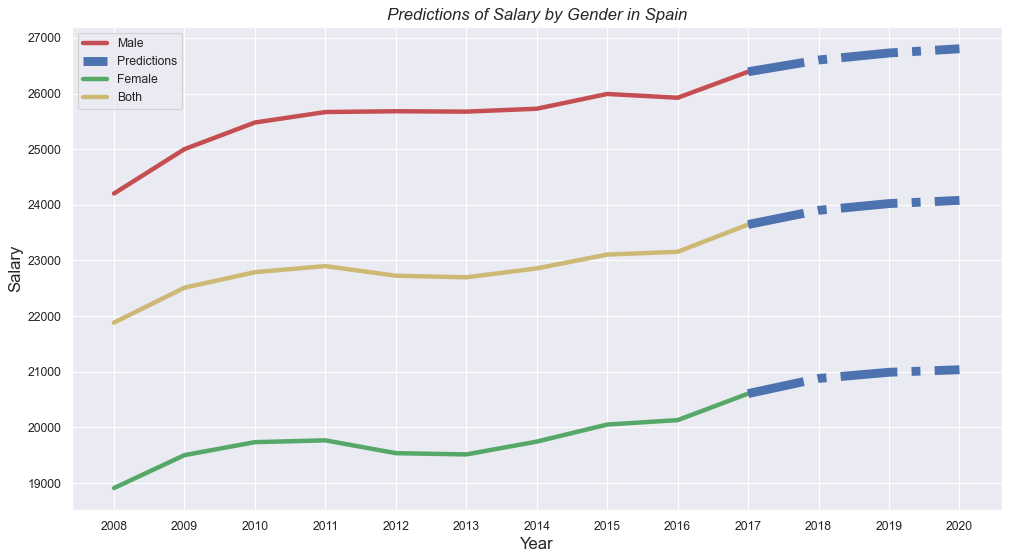

In [36]:
plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(year[0:len(a.gross_income_euros)], a.gross_income_euros, 'r',label='Male',lw = 4)
plt.plot(year[9:13], prediction.predictions, 'b',linestyle='-.',lw = 8,label='Predictions')

plt.plot(year[0:len(b.gross_income_euros)], b.gross_income_euros, 'g',label='Female',lw = 4)
plt.plot(year[9:13], prediction_2.predictions, 'b',linestyle='-.',lw = 8)

plt.plot(year[0:len(c.gross_income_euros)], c.gross_income_euros, 'y',label='Both',lw = 4)
plt.plot(year[9:13], prediction_3.predictions, 'b',linestyle='-.',lw = 8)

plt.xticks(year)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.title('Predictions of Salary by Gender in Spain', fontstyle='oblique', fontsize=15)
plt.legend()


plt.show()